In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb


In [6]:
from pandas import read_csv

data = pd.read_csv(r'C:\Users\Tomas\Notebooks Python\rend_diario.csv',
                       index_col=0, parse_dates=True, dayfirst=True)

# data es el dataframe que contiene el rendimiento diario en dólares de todos los índices

data = data.iloc[1:5963, 2:13] # le quito la primer fila que está compuesta por NAs
data.head(5)

,MERV_diario,BVSP_diario,GSPC_diario,NDX_diario,FTSE_diario,GDAXI_diario,FCHI_diario,N225_diario,HSI_diario,SSEC_diario,BSESN_diario
FECHA,,,,,,,,,,,
1997-07-03,0.929826,0.086285,1.425833,1.085122,3.001574,2.039279,1.116075,0.559379,-1.485951,-4.044444,-0.213017
1997-07-04,0.772897,-31.055785,-0.131839,0.114093,3.187888,0.070745,-0.191773,-0.811322,-1.866134,-2.074027,-0.662731
1997-07-07,0.416186,47.400318,-0.383430,0.343687,-3.596321,1.398478,0.414040,-0.513522,0.589664,-2.661495,-0.161848
1997-07-08,0.541217,0.748911,0.718043,1.490356,-0.997135,0.255689,-1.014525,0.611764,-0.457160,1.170353,0.404193
1997-07-09,-0.031313,-0.085095,-1.220138,0.426520,-0.184771,-0.077669,0.709948,-0.973793,-0.590586,1.005392,2.339823


In [7]:
data.dtypes

MERV_diario     float64
BVSP_diario     float64
GSPC_diario     float64
NDX_diario      float64
FTSE_diario     float64
GDAXI_diario    float64
FCHI_diario     float64
N225_diario     float64
HSI_diario      float64
SSEC_diario     float64
BSESN_diario    float64
dtype: object

# Modelo VAR

Como estamos trabajando con los rendimientos diarios de los índices, nos encontramos ante una serie que ya es estacionaria, por lo que no es necesario aplicar diferencias y podemos pasar directamente a aplicar el modelo VAR sobre la serie. Al predecir directamente sobre los valores y no sobre sus diferencias, el modelo se llama "VAR en niveles". 

Uno se puede preguntar por qué aplicar un modelo VAR que involucre simultáneamente a todos los índices financieros (y su pasado) simultáneamente cuando talvez es más interpretable un modelo ARMA univariante aplicado a cada índice por separado. Y la respuesta es simple. Un modelo AR o ARMA univariado no tiene en cuenta las relaciones entre las variables al momento de predecir porque utiliza únicamente los valores anteriores de la propia variable en cuestión, en cambio el modelo VAR nos permite considerar todos los índices en simultáneo y la influencia que puedan ejercerse entre sí. 

Usar las relaciones entre las varaibles genera mejores predicciones porque incorpora el comportamiento dinámico de los datos. En esta época en que la globalizacion hace que las economías mundiales se encuentran más integradas que nunca, no sería realista analizar el mercado financiero de cada país por separado, ignorando la interconectividad que caracteriza el tiempo que vivimos. 

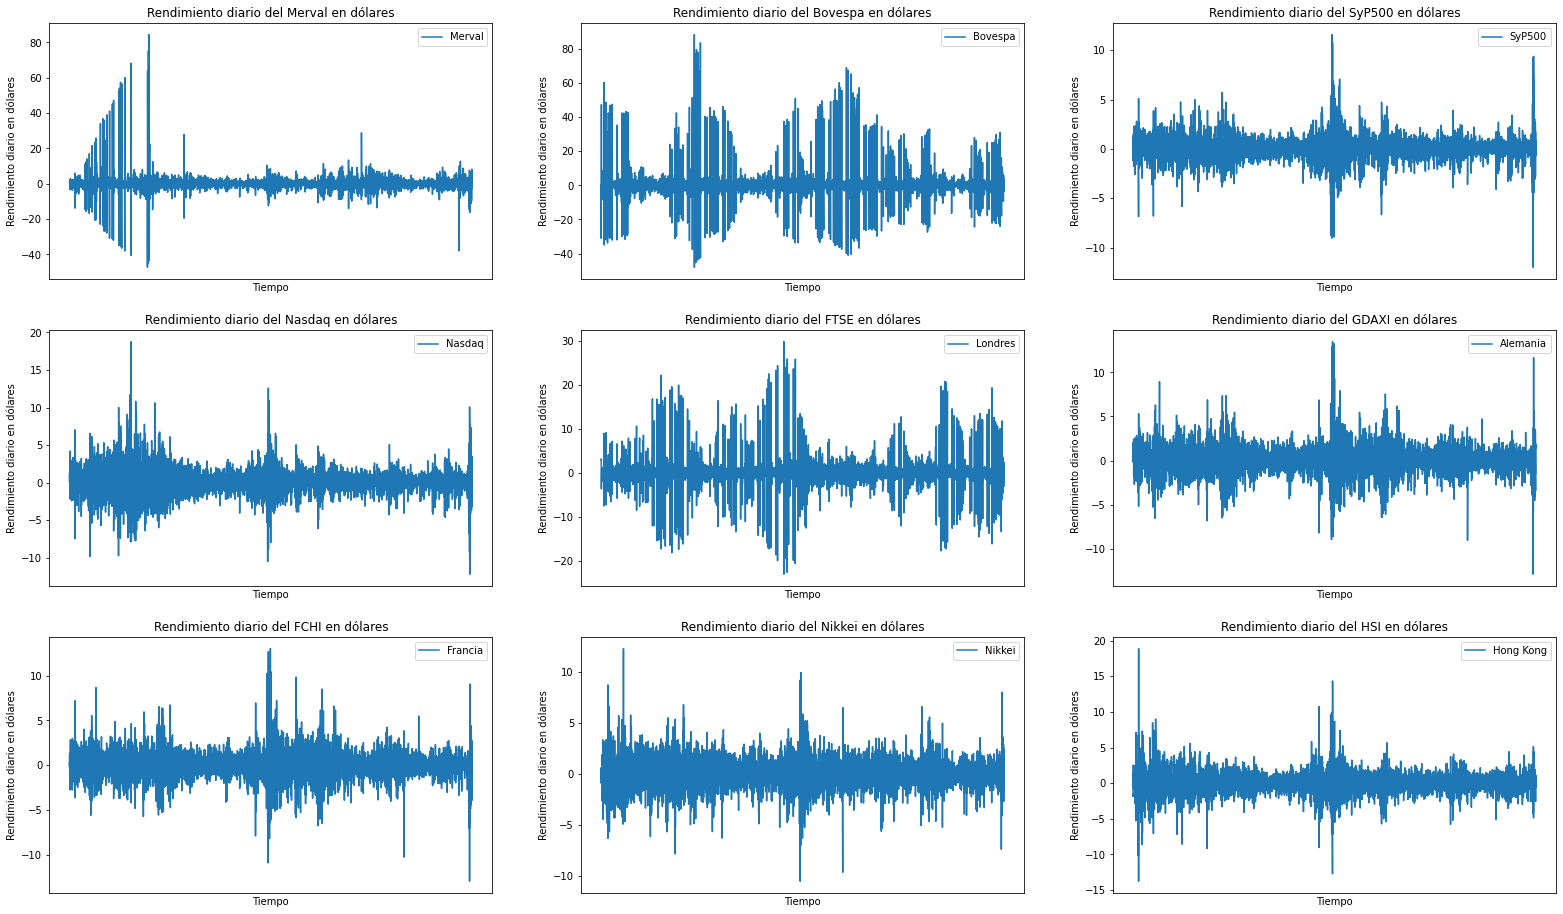

In [8]:
# el siguiente gráfico es útil para corroborar que las series de todos los índices financieros son efectivamente estacionarias

plt.figure(figsize=(27,16))

plt.subplot(331)
sb.lineplot(data = data.MERV_diario, label = "Merval")
plt.title('Rendimiento diario del Merval en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(332)
sb.lineplot(data = data.BVSP_diario, label = "Bovespa")
plt.title('Rendimiento diario del Bovespa en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(333)
sb.lineplot(data = data.GSPC_diario, label = "SyP500")
plt.title('Rendimiento diario del SyP500 en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(334)
sb.lineplot(data = data.NDX_diario, label = "Nasdaq")
plt.title('Rendimiento diario del Nasdaq en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(335)
sb.lineplot(data = data.FTSE_diario, label = "Londres")
plt.title('Rendimiento diario del FTSE en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(336)
sb.lineplot(data = data.GDAXI_diario, label = "Alemania")
plt.title('Rendimiento diario del GDAXI en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(337)
sb.lineplot(data = data.FCHI_diario, label = "Francia")
plt.title('Rendimiento diario del FCHI en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(338)
sb.lineplot(data = data.N225_diario, label = "Nikkei")
plt.title('Rendimiento diario del Nikkei en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.subplot(339)
sb.lineplot(data = data.HSI_diario, label = "Hong Kong")
plt.title('Rendimiento diario del HSI en dólares')
plt.ylabel('Rendimiento diario en dólares')
plt.xlabel('Tiempo')
plt.xticks([])

plt.savefig('son_todos_ruido_blanco.png')



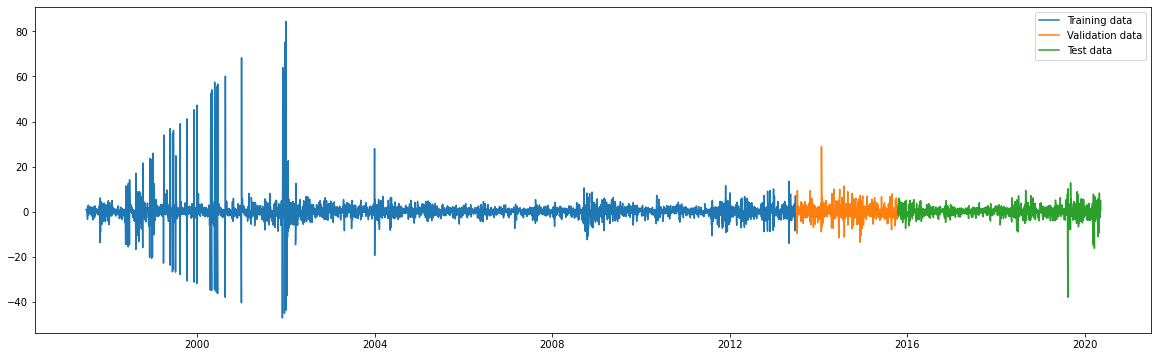

In [9]:
import warnings
warnings.filterwarnings("ignore")

#creating the train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):int(0.8*(len(data)))]
test = data[int(0.8*(len(data))):]

cols = data.columns 

# podemos ver cómo quedó la distribución del conjunto de entrenamiento y validación (para poder visualizar se usa sólo el MERVAL)

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(train.index,train['MERV_diario'], label='Training data')
ax.plot(valid.index, valid['MERV_diario'], label='Validation data')
ax.plot(test.index, test['MERV_diario'], label='Test data')
ax.legend()
plt.show()


In [10]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [11]:
#converting predictions to dataframe

from sklearn.metrics import mean_squared_error

cols = data.columns 

pred = pd.DataFrame(index=range(0,len(prediction)), columns=[cols])
for j in range(0,11):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

valid = valid.values.T.tolist()
pred = pred.values.T.tolist()


#check rmse
for (col,i) in zip(cols, range(len(valid))):
    print('el error en ', col, 'es : ', mean_squared_error(valid[i], pred[i]))

el error en  MERV_diario es :  10.385891455592985
el error en  BVSP_diario es :  30.078659604182576
el error en  GSPC_diario es :  0.610077953383308
el error en  NDX_diario es :  0.8536826830845282
el error en  FTSE_diario es :  3.8555096594684164
el error en  GDAXI_diario es :  1.3000771768788715
el error en  FCHI_diario es :  1.239293049927111
el error en  N225_diario es :  1.3592223814092708
el error en  HSI_diario es :  1.0851617170566032
el error en  SSEC_diario es :  9.029839418739943
el error en  BSESN_diario es :  1.5560325946097933


In [12]:
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

def aplicar_var(lags:int):
    modelo = VAR(endog=train)
    modelo_fit = modelo.fit(maxlags=lags)
    predicciones = modelo_fit.forecast(model_fit.y, steps=len(valid))
    predis = pd.DataFrame(index=range(0,len(predicciones)), columns=[cols])
    for j in range(0,11):
        for i in range(0, len(predicciones)):
           predis.iloc[i][j] = predicciones[i][j]
    validacion = valid.values.T.tolist()
    predis = predis.values.T.tolist()
    for (col,i) in zip(cols, range(len(validacion))):
        print('el error en ', col, 'es : ', mean_squared_error(validacion[i], predis[i]))
    
    for (col, i) in zip(cols, range(len(validacion))):
        pyplot.plot(validacion[i])
        pyplot.plot(predis[i], color = 'red')
        plt.title(col)
        pyplot.show()



el error en  MERV_diario es :  10.394002546287139
el error en  BVSP_diario es :  30.043149577150913
el error en  GSPC_diario es :  0.6102331004972503
el error en  NDX_diario es :  0.8540552899957164
el error en  FTSE_diario es :  3.8598165970582756
el error en  GDAXI_diario es :  1.3018935056013003
el error en  FCHI_diario es :  1.2415856426633107
el error en  N225_diario es :  1.3614027641595563
el error en  HSI_diario es :  1.0840798442718578
el error en  SSEC_diario es :  9.027210227156216
el error en  BSESN_diario es :  1.555296680973117


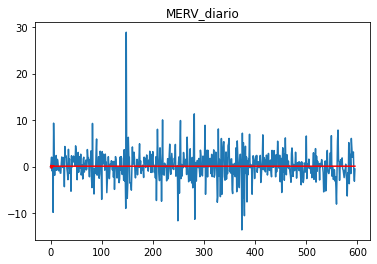

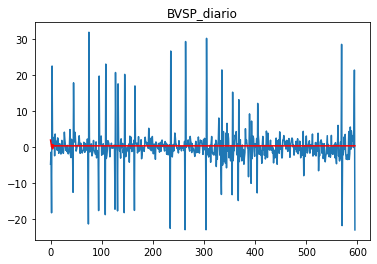

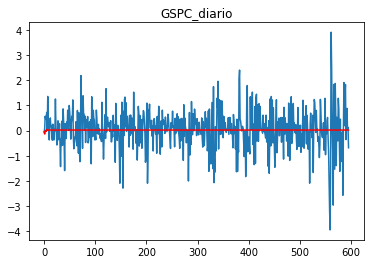

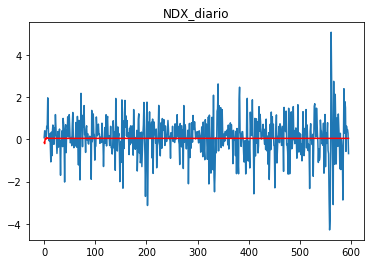

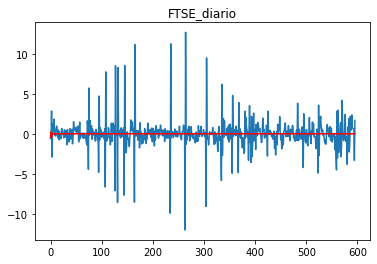

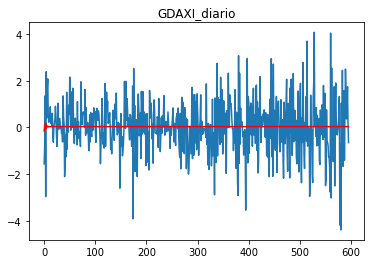

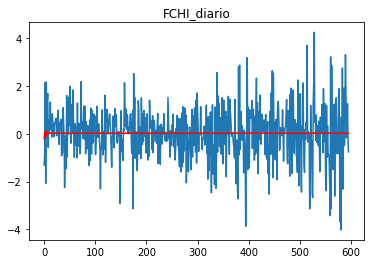

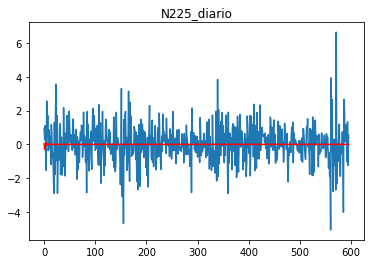

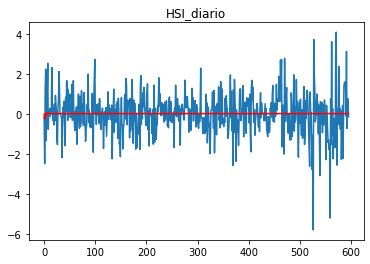

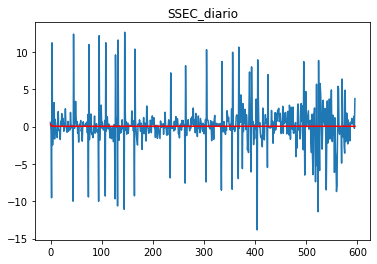

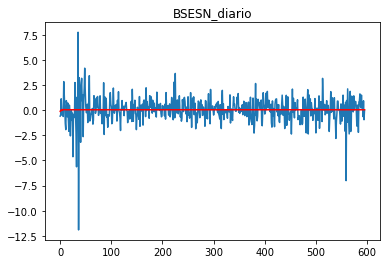

In [184]:
aplicar_var(5)

In [185]:
def aplicar_var_simultaneo(lags:int):
    modelo = VAR(endog=train)
    modelo_fit = modelo.fit(maxlags=lags)
    predicciones = modelo_fit.forecast(model_fit.y, steps=len(valid))
    predis = pd.DataFrame(index=range(0,len(predicciones)), columns=[cols])
    for j in range(0,11):
        for i in range(0, len(predicciones)):
           predis.iloc[i][j] = predicciones[i][j]
    validacion = valid.values.T.tolist()
    predis = predis.values.T.tolist()
    for (col,i) in zip(cols, range(len(validacion))):
         return mean_squared_error(validacion[i], predis[i]).mean()
    

In [186]:
for lags in range(10, 21):
    ECM = aplicar_var_simultaneo(lags)
    print('con ', lags, 'lags el ECM promedio fue de :', ECM)

con  10 lags el ECM promedio fue de : 10.423844139886981
con  11 lags el ECM promedio fue de : 10.454342850947226
con  12 lags el ECM promedio fue de : 10.451727563556119
con  13 lags el ECM promedio fue de : 10.425707712298722
con  14 lags el ECM promedio fue de : 10.415882989468539
con  15 lags el ECM promedio fue de : 10.428298422829556
con  16 lags el ECM promedio fue de : 10.420958634699856
con  17 lags el ECM promedio fue de : 10.461903659422456
con  18 lags el ECM promedio fue de : 10.474394647340574
con  19 lags el ECM promedio fue de : 10.468152427499051
con  20 lags el ECM promedio fue de : 10.468864760276384


In [187]:
def testear_var(lags:int):
    modelo = VAR(endog=train)
    modelo_fit = modelo.fit(maxlags=lags)
    predicciones = modelo_fit.forecast(model_fit.y, steps=len(test))
    predis = pd.DataFrame(index=range(0,len(predicciones)), columns=[cols])
    for j in range(0,11):
        for i in range(0, len(predicciones)):
           predis.iloc[i][j] = predicciones[i][j]
    originales = test.values.T.tolist()
    predis = predis.values.T.tolist()
    for (col,i) in zip(cols, range(len(originales))):
         return mean_squared_error(originales[i], predis[i]).mean()

In [188]:
for lags in range(10, 21):
    ECM = testear_var(lags)
    print('con ', lags, 'lags el ECM promedio fue de :', ECM)

con  10 lags el ECM promedio fue de : 6.9273211261959915
con  11 lags el ECM promedio fue de : 6.934337581582189
con  12 lags el ECM promedio fue de : 6.9351189539249845
con  13 lags el ECM promedio fue de : 6.9354446846330555
con  14 lags el ECM promedio fue de : 6.931622250093876
con  15 lags el ECM promedio fue de : 6.9348301500874685
con  16 lags el ECM promedio fue de : 6.937891655767531
con  17 lags el ECM promedio fue de : 6.933043226195041
con  18 lags el ECM promedio fue de : 6.935361153895447
con  19 lags el ECM promedio fue de : 6.944267369911702
con  20 lags el ECM promedio fue de : 6.942474968924671
